In [1]:
# Parameters - Constants
TRAIN_FRACTION = 0.7

RANDOM_SEED = 86720

CV_VALIDATE_SPLIT = 5

MAX_TREE_DEPTH = 20

In [2]:
# Libraries to import
import re
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import StratifiedKFold


import matplotlib
from matplotlib import pyplot as plt


# font set for graphs
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [3]:
# Read Data into raw data
raw_data = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [4]:
classification = 'Outcome'
features = list(raw_data.columns)
features.remove(classification)

In [5]:
# Split into train and test
training_data = raw_data.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)
training_class = training_data.loc[:,classification].values
training_features = training_data.loc[:,features].values


test_data = raw_data.drop(index=training_data.index)
test_class = test_data.loc[:,classification].values
test_features = test_data.loc[:,features].values

In [6]:
criterion = 'entropy'
splitter  = 'best'
records=[]

for depth in range(1,MAX_TREE_DEPTH+1):

    # Create a Decision Tree Classifier with the 
    # best split, mentioned depth and entropy loss criterion
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   max_depth=depth,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,training_features, training_class, test_features, test_class, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('Depth: %d, Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(depth,avg_expected_loss,avg_bias,avg_var))
    records.append([depth,avg_expected_loss,avg_bias,avg_var])
    
dbv_entropy=pd.DataFrame.from_records(records,columns=['Depth','Loss','BiasSquare','Variance'])
dbv_entropy.to_csv('Results/BVS_Depth_Entropy.csv',index=False)

Depth: 1, Expected loss: 0.264, Bias: 0.248, Variance: 0.137
Depth: 2, Expected loss: 0.225, Bias: 0.191, Variance: 0.109
Depth: 3, Expected loss: 0.233, Bias: 0.200, Variance: 0.130
Depth: 4, Expected loss: 0.242, Bias: 0.191, Variance: 0.166
Depth: 5, Expected loss: 0.246, Bias: 0.183, Variance: 0.174
Depth: 6, Expected loss: 0.254, Bias: 0.183, Variance: 0.189
Depth: 7, Expected loss: 0.263, Bias: 0.170, Variance: 0.200
Depth: 8, Expected loss: 0.267, Bias: 0.161, Variance: 0.206
Depth: 9, Expected loss: 0.274, Bias: 0.178, Variance: 0.211
Depth: 10, Expected loss: 0.278, Bias: 0.178, Variance: 0.214
Depth: 11, Expected loss: 0.278, Bias: 0.191, Variance: 0.213
Depth: 12, Expected loss: 0.279, Bias: 0.178, Variance: 0.213
Depth: 13, Expected loss: 0.278, Bias: 0.183, Variance: 0.213
Depth: 14, Expected loss: 0.279, Bias: 0.178, Variance: 0.213
Depth: 15, Expected loss: 0.278, Bias: 0.178, Variance: 0.213
Depth: 16, Expected loss: 0.279, Bias: 0.183, Variance: 0.213
Depth: 17, Expect

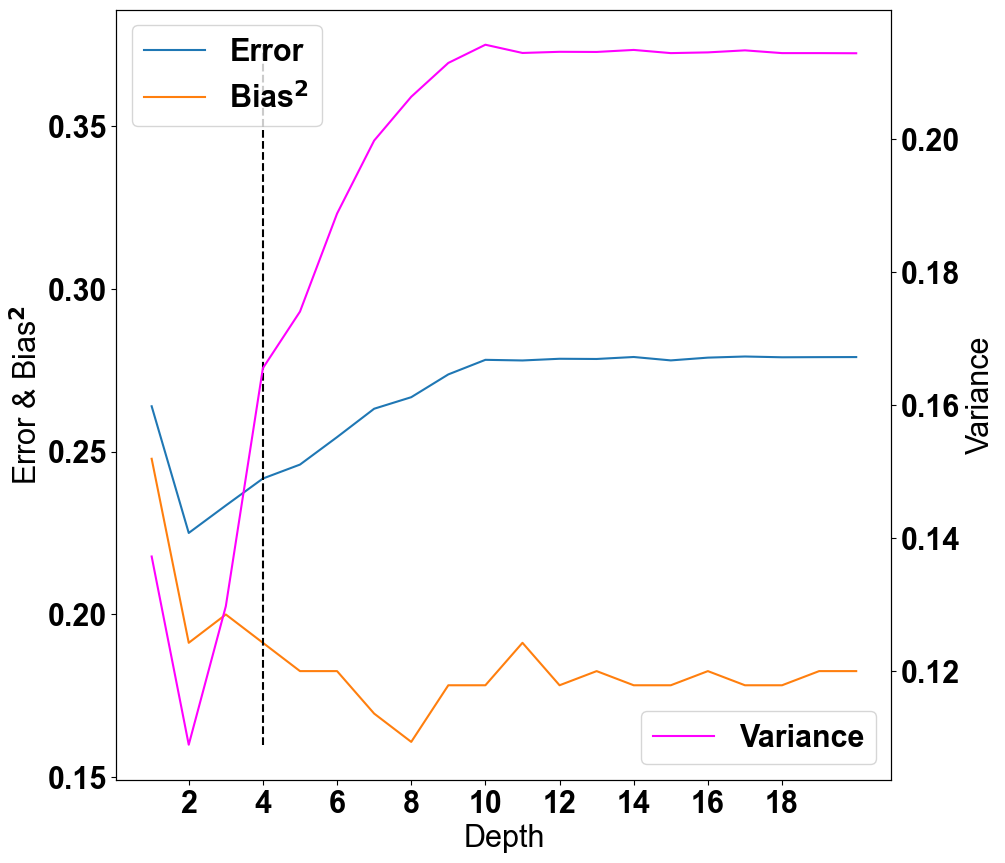

In [7]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
ax1.plot(dbv_entropy.iloc[:MAX_TREE_DEPTH,0],dbv_entropy.iloc[:MAX_TREE_DEPTH,1])
ax1.plot(dbv_entropy.iloc[:MAX_TREE_DEPTH,0],dbv_entropy.iloc[:MAX_TREE_DEPTH,2])
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
ax2.plot(dbv_entropy.iloc[:MAX_TREE_DEPTH,0],dbv_entropy.iloc[:MAX_TREE_DEPTH,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=4,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')

fig.savefig('Plots/BVS_Depth_Entropy.svg',format='svg')

plt.show()

In [8]:
criterion = 'gini'
splitter  = 'best'
records=[]

for depth in range(1,MAX_TREE_DEPTH+1):

    # Create a Decision Tree Classifier with the 
    # best split, mentioned depth and gini loss criterion
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   max_depth=depth,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,training_features, training_class, test_features, test_class, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('Depth: %d, Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(depth,avg_expected_loss,avg_bias,avg_var))
    records.append([depth,avg_expected_loss,avg_bias,avg_var])
    
dbv_gini=pd.DataFrame.from_records(records,columns=['Depth','Loss','BiasSquare','Variance'])
dbv_gini.to_csv('Results/BVS_Depth_Gini.csv',index=False)

Depth: 1, Expected loss: 0.247, Bias: 0.226, Variance: 0.124
Depth: 2, Expected loss: 0.225, Bias: 0.191, Variance: 0.107
Depth: 3, Expected loss: 0.240, Bias: 0.213, Variance: 0.138
Depth: 4, Expected loss: 0.243, Bias: 0.196, Variance: 0.161
Depth: 5, Expected loss: 0.251, Bias: 0.183, Variance: 0.176
Depth: 6, Expected loss: 0.260, Bias: 0.191, Variance: 0.192
Depth: 7, Expected loss: 0.268, Bias: 0.196, Variance: 0.204
Depth: 8, Expected loss: 0.276, Bias: 0.187, Variance: 0.211
Depth: 9, Expected loss: 0.280, Bias: 0.178, Variance: 0.215
Depth: 10, Expected loss: 0.281, Bias: 0.187, Variance: 0.217
Depth: 11, Expected loss: 0.283, Bias: 0.183, Variance: 0.218
Depth: 12, Expected loss: 0.283, Bias: 0.191, Variance: 0.218
Depth: 13, Expected loss: 0.284, Bias: 0.191, Variance: 0.217
Depth: 14, Expected loss: 0.284, Bias: 0.191, Variance: 0.217
Depth: 15, Expected loss: 0.284, Bias: 0.196, Variance: 0.217
Depth: 16, Expected loss: 0.284, Bias: 0.196, Variance: 0.217
Depth: 17, Expect

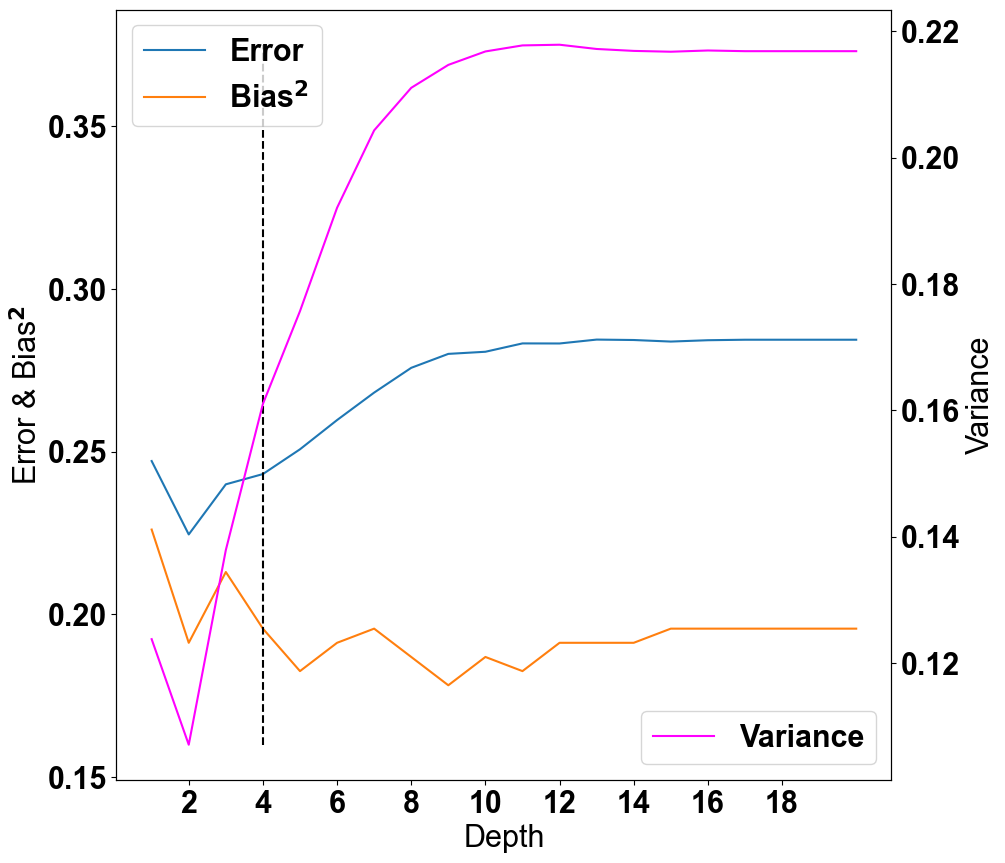

In [9]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
ax1.plot(dbv_gini.iloc[:MAX_TREE_DEPTH,0],dbv_gini.iloc[:MAX_TREE_DEPTH,1])
ax1.plot(dbv_gini.iloc[:MAX_TREE_DEPTH,0],dbv_gini.iloc[:MAX_TREE_DEPTH,2])
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
ax2.plot(dbv_gini.iloc[:MAX_TREE_DEPTH,0],dbv_gini.iloc[:MAX_TREE_DEPTH,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=4,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')

fig.savefig('Plots/BVS_Depth_Gini.svg',format='svg')

plt.show()

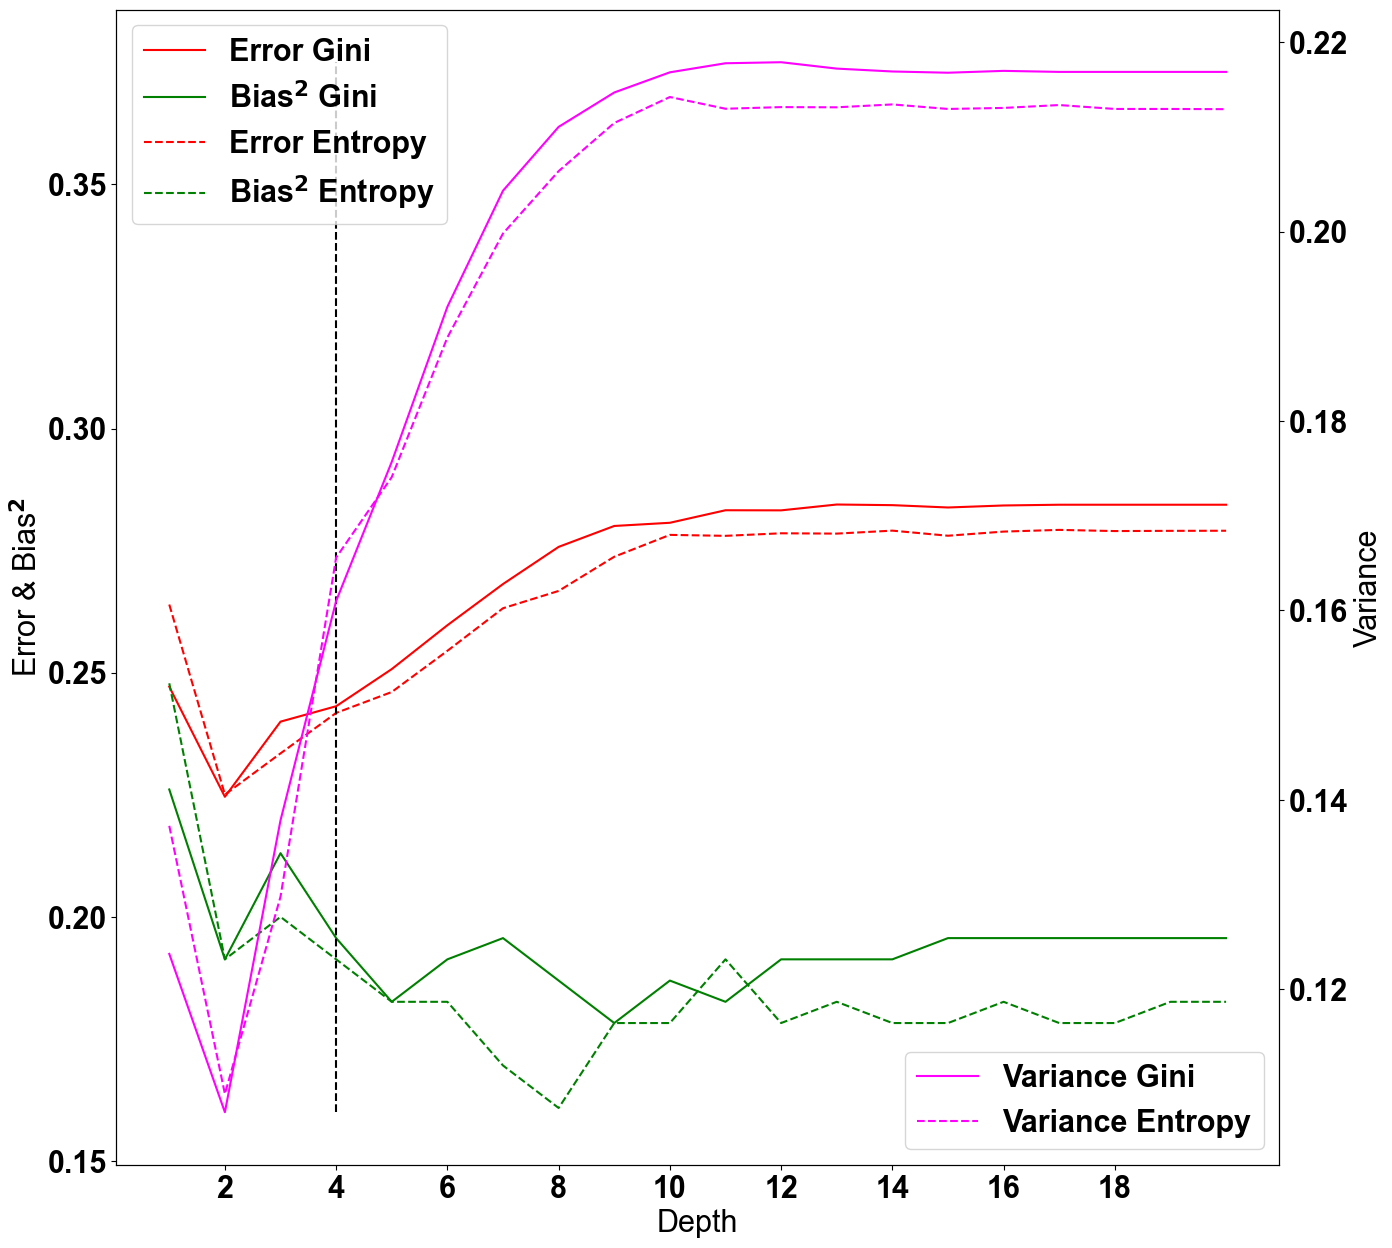

In [10]:
fig,ax1=plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
ax1.plot(dbv_gini.iloc[:MAX_TREE_DEPTH,0],dbv_gini.iloc[:MAX_TREE_DEPTH,1],'-r')
ax1.plot(dbv_gini.iloc[:MAX_TREE_DEPTH,0],dbv_gini.iloc[:MAX_TREE_DEPTH,2],'-g')
ax1.plot(dbv_entropy.iloc[:MAX_TREE_DEPTH,0],dbv_entropy.iloc[:MAX_TREE_DEPTH,1],'--r')
ax1.plot(dbv_entropy.iloc[:MAX_TREE_DEPTH,0],dbv_entropy.iloc[:MAX_TREE_DEPTH,2],'--g')
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
ax2.plot(dbv_gini.iloc[:MAX_TREE_DEPTH,0],dbv_gini.iloc[:MAX_TREE_DEPTH,3],color='magenta')
ax2.plot(dbv_entropy.iloc[:MAX_TREE_DEPTH,0],dbv_entropy.iloc[:MAX_TREE_DEPTH,3],color='magenta',linestyle='dashed')
ax2.set_ylabel('Variance') 
ax1.vlines(x=4,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
ax1.legend(['Error Gini','Bias${^2}$ Gini','Error Entropy','Bias${^2}$ Entropy'],loc='upper left')
ax2.legend(['Variance Gini','Variance Entropy'],loc='lower right')

fig.savefig('Plots/BVS_Depth_Gini_Entropy.svg',format='svg')

plt.show()

In [11]:
criterion = 'entropy'
splitter  = 'best'
records=[]

samples_leaf=np.linspace(0.001,0.4,50)

for min_samples_leaf in samples_leaf:

    # Create a Decision Tree Classifier with the 
    # best split, mentioned min samples leaf and entropy loss criterion
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,training_features, training_class, test_features, test_class, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('MSL: %0.3f,Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(min_samples_leaf,avg_expected_loss,avg_bias,avg_var))
    records.append([min_samples_leaf,avg_expected_loss,avg_bias,avg_var])
    
mslbv_entropy=pd.DataFrame.from_records(records,columns=['MinSamplesLeaf','Loss','BiasSquare','Variance'])
mslbv_entropy.to_csv('Results/BVS_MSL_Entropy.csv',index=False)
    

MSL: 0.001,Expected loss: 0.279, Bias: 0.183, Variance: 0.213
MSL: 0.009,Expected loss: 0.275, Bias: 0.148, Variance: 0.211
MSL: 0.017,Expected loss: 0.257, Bias: 0.165, Variance: 0.192
MSL: 0.025,Expected loss: 0.249, Bias: 0.174, Variance: 0.180
MSL: 0.034,Expected loss: 0.241, Bias: 0.174, Variance: 0.170
MSL: 0.042,Expected loss: 0.234, Bias: 0.178, Variance: 0.161
MSL: 0.050,Expected loss: 0.233, Bias: 0.183, Variance: 0.160
MSL: 0.058,Expected loss: 0.228, Bias: 0.200, Variance: 0.150
MSL: 0.066,Expected loss: 0.226, Bias: 0.204, Variance: 0.144
MSL: 0.074,Expected loss: 0.223, Bias: 0.196, Variance: 0.138
MSL: 0.082,Expected loss: 0.221, Bias: 0.187, Variance: 0.130
MSL: 0.091,Expected loss: 0.219, Bias: 0.187, Variance: 0.124
MSL: 0.099,Expected loss: 0.218, Bias: 0.183, Variance: 0.120
MSL: 0.107,Expected loss: 0.218, Bias: 0.187, Variance: 0.115
MSL: 0.115,Expected loss: 0.219, Bias: 0.191, Variance: 0.113
MSL: 0.123,Expected loss: 0.219, Bias: 0.191, Variance: 0.111
MSL: 0.1

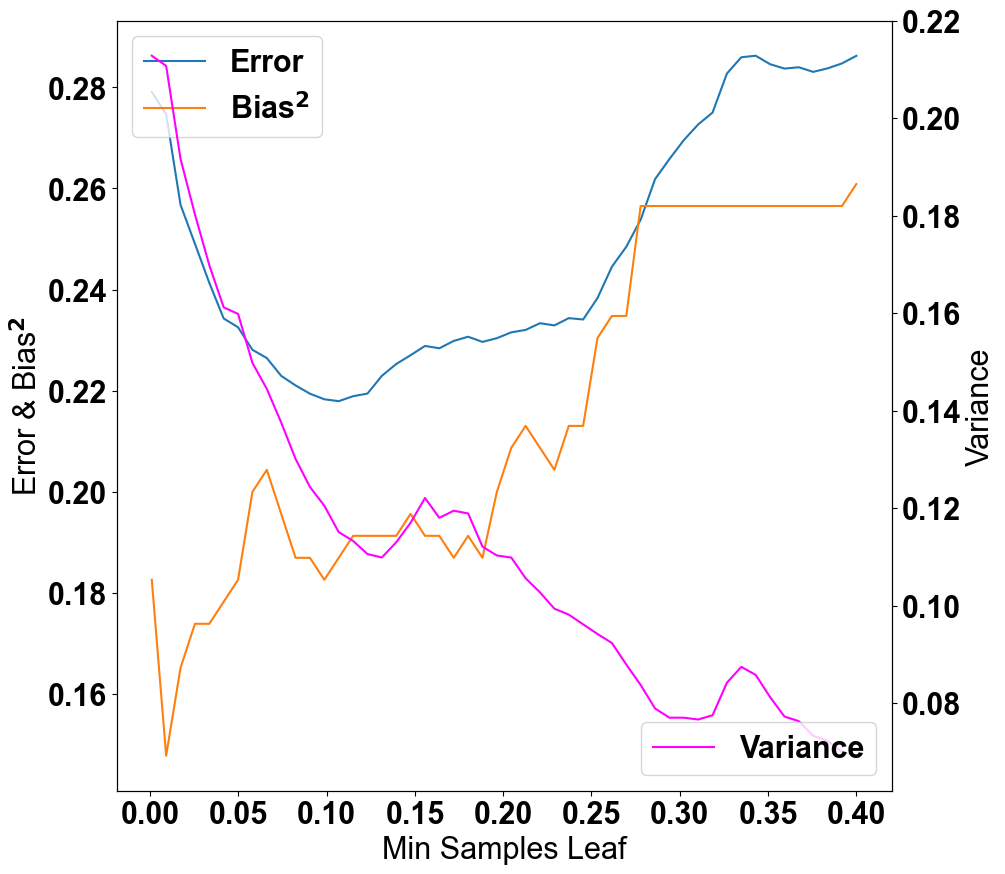

In [12]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples Leaf') 
ax1.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,1])
ax1.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,2])
ax1.set_xticks(np.linspace(0.0,0.4,9))

ax2=ax1.twinx()
ax2.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,3],color='magenta')
ax2.set_ylabel('Variance') 
#ax1.vlines(x=4,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')

fig.savefig('Plots/BVS_MSL_Entropy.svg',format='svg')

plt.show()

In [13]:
criterion = 'gini'
splitter  = 'best'
records=[]

samples_leaf=np.linspace(0.001,0.4,50)

for min_samples_leaf in samples_leaf:

    # Create a Decision Tree Classifier with the 
    # best split, mentioned min samples leaf and gini loss criterion
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,training_features, training_class, test_features, test_class, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('MSL: %0.3f,Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(min_samples_leaf,avg_expected_loss,avg_bias,avg_var))
    records.append([min_samples_leaf,avg_expected_loss,avg_bias,avg_var])
    
mslbv_gini=pd.DataFrame.from_records(records,columns=['MinSamplesLeaf','Loss','BiasSquare','Variance'])
mslbv_gini.to_csv('Results/BVS_MSL_Gini.csv',index=False)

MSL: 0.001,Expected loss: 0.284, Bias: 0.196, Variance: 0.217
MSL: 0.009,Expected loss: 0.276, Bias: 0.178, Variance: 0.207
MSL: 0.017,Expected loss: 0.261, Bias: 0.178, Variance: 0.191
MSL: 0.025,Expected loss: 0.250, Bias: 0.187, Variance: 0.177
MSL: 0.034,Expected loss: 0.240, Bias: 0.191, Variance: 0.162
MSL: 0.042,Expected loss: 0.236, Bias: 0.191, Variance: 0.155
MSL: 0.050,Expected loss: 0.234, Bias: 0.191, Variance: 0.152
MSL: 0.058,Expected loss: 0.231, Bias: 0.196, Variance: 0.146
MSL: 0.066,Expected loss: 0.230, Bias: 0.196, Variance: 0.140
MSL: 0.074,Expected loss: 0.224, Bias: 0.191, Variance: 0.132
MSL: 0.082,Expected loss: 0.222, Bias: 0.187, Variance: 0.124
MSL: 0.091,Expected loss: 0.222, Bias: 0.183, Variance: 0.121
MSL: 0.099,Expected loss: 0.221, Bias: 0.196, Variance: 0.115
MSL: 0.107,Expected loss: 0.221, Bias: 0.191, Variance: 0.109
MSL: 0.115,Expected loss: 0.223, Bias: 0.196, Variance: 0.111
MSL: 0.123,Expected loss: 0.225, Bias: 0.191, Variance: 0.113
MSL: 0.1

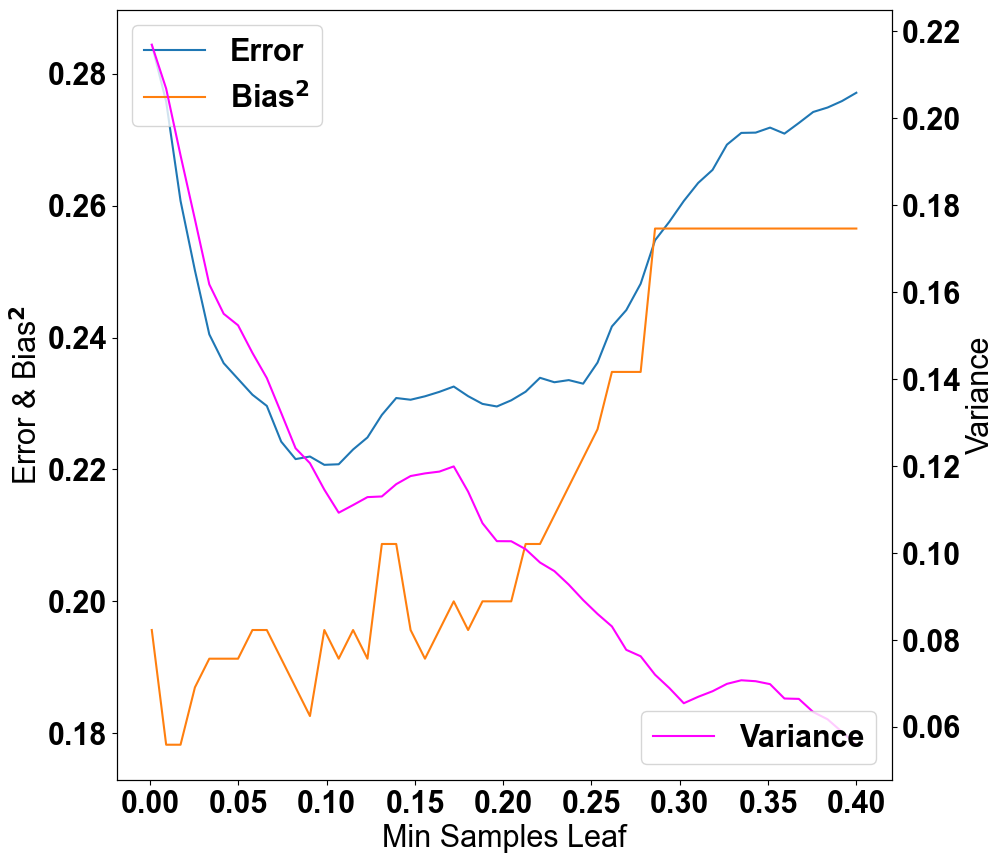

In [14]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples Leaf') 
ax1.plot(mslbv_gini.iloc[:,0],mslbv_gini.iloc[:,1])
ax1.plot(mslbv_gini.iloc[:,0],mslbv_gini.iloc[:,2])
ax1.set_xticks(np.linspace(0.0,0.4,9))

ax2=ax1.twinx()
ax2.plot(mslbv_gini.iloc[:,0],mslbv_gini.iloc[:,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')

fig.savefig('Plots/BVS_MSL_Gini.svg',format='svg')

plt.show()

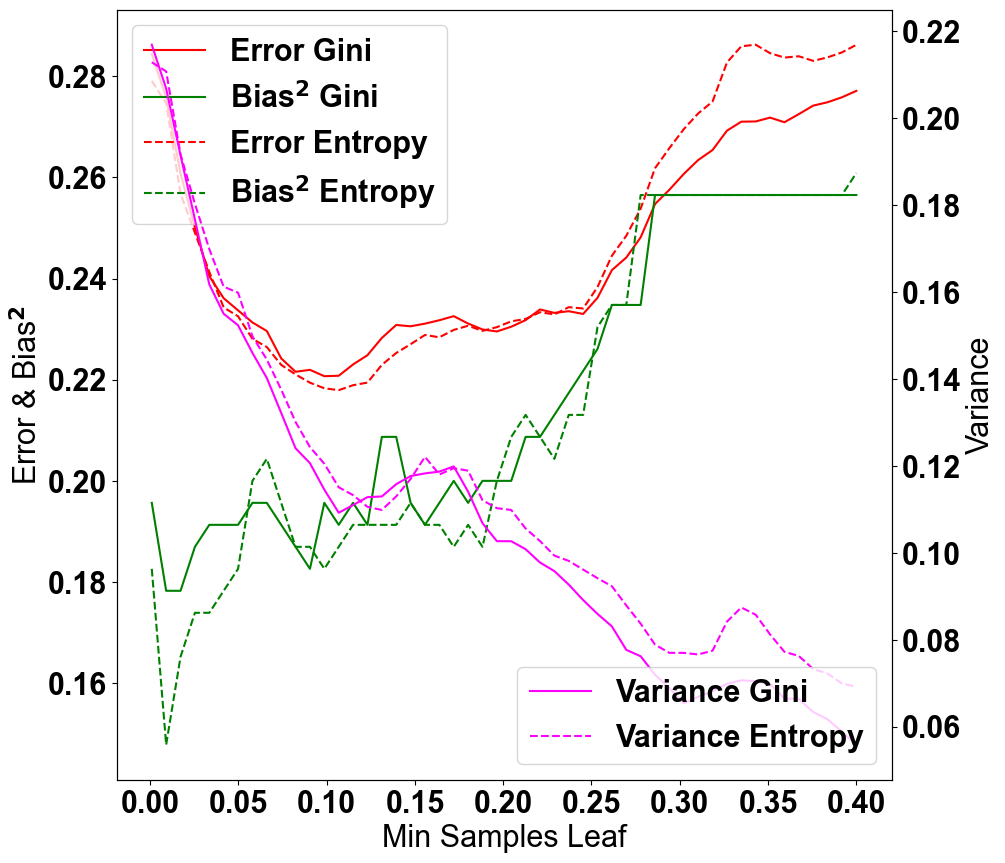

In [15]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples Leaf') 
ax1.plot(mslbv_gini.iloc[:,0],mslbv_gini.iloc[:,1],'-r')
ax1.plot(mslbv_gini.iloc[:,0],mslbv_gini.iloc[:,2],'-g')
ax1.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,1],'--r')
ax1.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,2],'--g')
ax1.set_xticks(np.linspace(0.0,0.4,9))

ax2=ax1.twinx()
ax2.plot(mslbv_gini.iloc[:,0],mslbv_gini.iloc[:,3],color='magenta')
ax2.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,3],color='magenta',linestyle='dashed')
ax2.set_ylabel('Variance') 
ax1.legend(['Error Gini','Bias${^2}$ Gini','Error Entropy','Bias${^2}$ Entropy'],loc='upper left')
ax2.legend(['Variance Gini', 'Variance Entropy'],loc='lower right')

fig.savefig('Plots/BVS_MSL_Gini_Entropy.svg',format='svg')

plt.show()